This notebook demonstrates how a multi layer perceptron can be used to approximate arbitrary (smooth) functions.

In [1]:
import math

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from ann.plotting import figure, figsize, savefig, subplots
from ann.two_layer_perceptron import TwoLayerPerceptron, \
                                     plot_generalization_performance, \
                                     plot_learning_curve

# Dataset Creation

Create a dataset by sampling evenly spaced points from a two dimensional gaussian distribution.

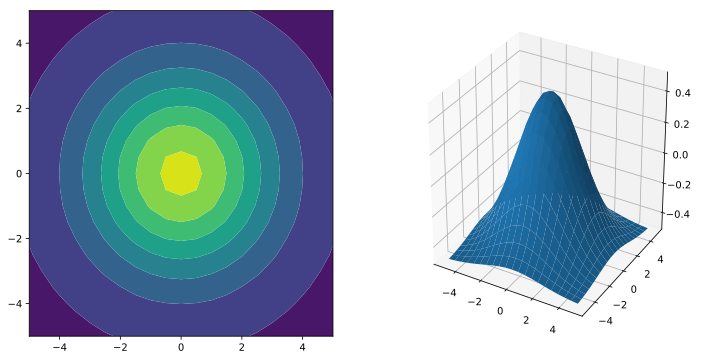

In [2]:
x = np.arange(-5, 5.5, 0.5)
y = np.arange(-5, 5.5, 0.5)

xx, yy = np.meshgrid(x, y)
                     
z = np.exp(-(xx**2 + yy**2) / 10) - 0.5

fig = figure(1, 2, size=figsize(1.5, 3))

ax = fig.add_subplot(1, 2, 1)
ax3d = fig.add_subplot(1, 2, 2, projection='3d')

ax.contourf(xx, yy, z)
ax3d.plot_surface(xx, yy, z)

savefig('gauss.svg')

Randomly shuffle datapoints and split off test set.

In [3]:
n = len(x) * len(y)

targets_unshuffled = z.reshape(1, n)
patterns_unshuffled = np.vstack((xx.reshape(1, n), yy.reshape(1, n)))

shuffle = np.random.permutation(patterns_unshuffled.shape[1])
targets = targets_unshuffled[:, shuffle]
patterns = patterns_unshuffled[:, shuffle]

# Initial Model Selection

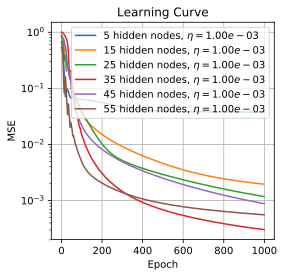

In [4]:
plot_learning_curve(patterns,
                    targets,
                    hidden_nodes=np.arange(5, 60, 10),
                    learning_rate=0.001,
                    momentum_alpha=0.9,
                    epochs=1000)

In [5]:
hidden_nodes_optimal = 30

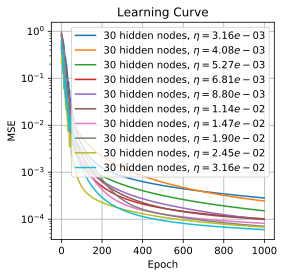

In [6]:
plot_learning_curve(patterns,
                    targets,
                    hidden_nodes=hidden_nodes_optimal,
                    learning_rate=np.logspace(-2.5, -1.5, 10),
                    momentum_alpha=0.9,
                    epochs=1000)

In [7]:
learning_rate_optimal = 3e-2
epochs_optimal = 800

# Visualize Approximated Function

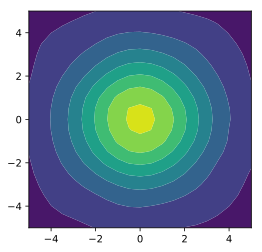

In [8]:
model = TwoLayerPerceptron(hidden_nodes=hidden_nodes_optimal)

model.train(patterns,
            targets,
            learning_rate=learning_rate_optimal,
            epochs=epochs_optimal)

zz = model.infer(patterns_unshuffled, threshold=False).reshape(len(yy), len(xx))

_, ax = subplots(1, 1)

ax.contourf(xx, yy, zz)

plt.show()

# Visualize Approximations for Varying Numbers of Hidden Nodes

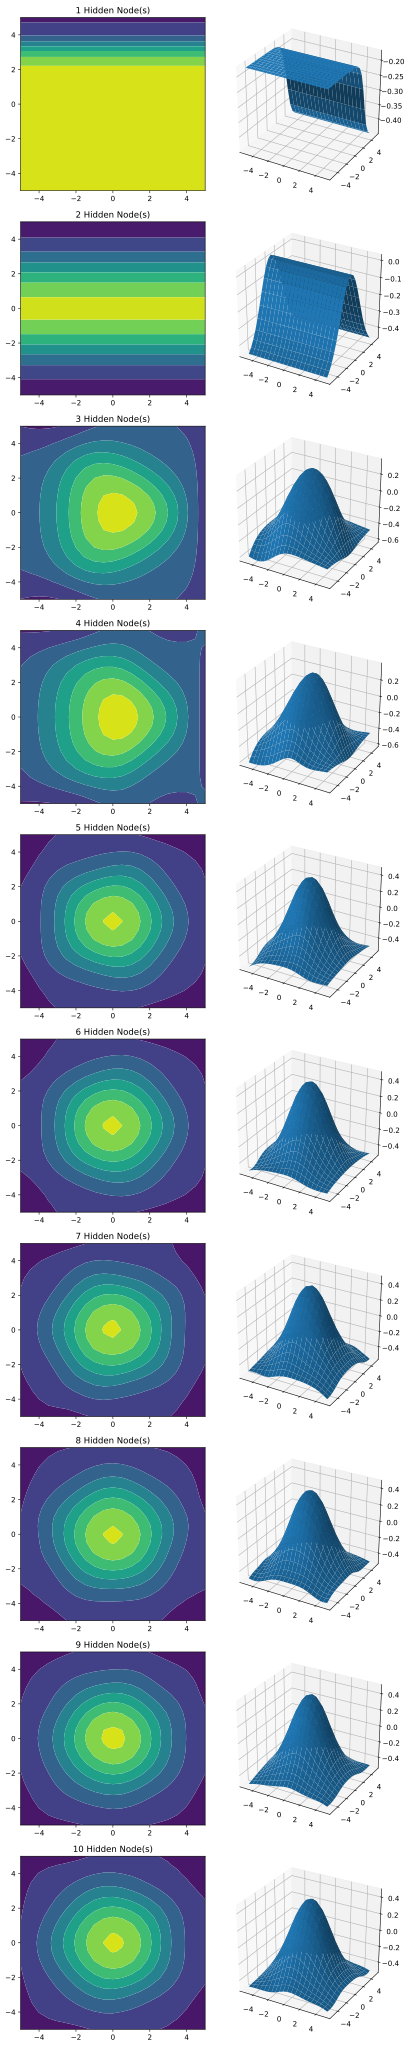

In [9]:
hidden_nodes = np.arange(1, 11, 1)

fig = figure(len(hidden_nodes), 2)

for i, hn in enumerate(hidden_nodes):
    model = TwoLayerPerceptron(hidden_nodes=hn)
    model.train(patterns, targets, learning_rate=0.01, epochs=10000)
    zz = model.infer(patterns_unshuffled, threshold=False).reshape(len(yy), len(xx))

    ax = fig.add_subplot(len(hidden_nodes), 2, 2 * i + 1)
    ax3d = fig.add_subplot(len(hidden_nodes), 2, 2 * i + 2, projection='3d')

    ax.contourf(xx, yy, zz)
    ax3d.plot_surface(xx, yy, zz)
    
    ax.set_title("{} Hidden Node(s)".format(hn))

plt.tight_layout()

savefig('gauss_approx_full.svg')

# Evaluate Generalization Performance

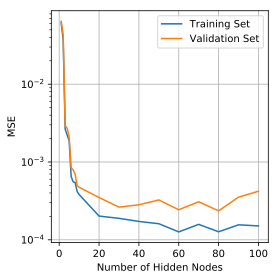

In [10]:
plot_generalization_performance(patterns,
                                targets,
                                split=0.5,
                                hidden_nodes=np.concatenate((range(1, 10), range(10, 101, 10))),
                                learning_rate=0.01,
                                momentum_alpha=0.9,
                                epochs=1000,
                                runs=10)

plt.tight_layout()

savefig('approx_generalization.svg')

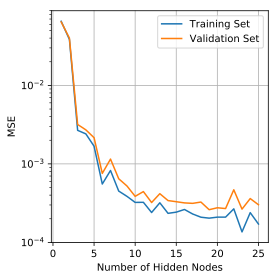

In [11]:
plot_generalization_performance(patterns,
                                targets,
                                split=0.5,
                                hidden_nodes=range(1, 26),
                                learning_rate=0.01,
                                momentum_alpha=0.9,
                                epochs=1000,
                                runs=10)

plt.tight_layout()

savefig('approx_generalization.svg')

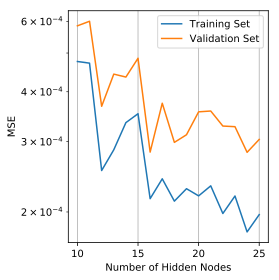

In [12]:
plot_generalization_performance(patterns,
                                targets,
                                split=0.5,
                                hidden_nodes=range(10, 26),
                                learning_rate=0.01,
                                momentum_alpha=0.9,
                                epochs=1000,
                                runs=10)

plt.tight_layout()

savefig('approx_generalization.svg')

# Vary Amount of Training Data

80/20 split: 7.941e-05 +/- 1.889e-05 training set MSE, 1.142e-04 +/- 5.574e-05 validation set MSE
75/25 split: 8.395e-05 +/- 2.690e-05 training set MSE, 1.216e-04 +/- 5.186e-05 validation set MSE
70/30 split: 7.472e-05 +/- 2.430e-05 training set MSE, 1.085e-04 +/- 4.634e-05 validation set MSE
64/36 split: 9.829e-05 +/- 2.026e-05 training set MSE, 1.428e-04 +/- 3.318e-05 validation set MSE
59/41 split: 8.794e-05 +/- 1.418e-05 training set MSE, 1.297e-04 +/- 3.871e-05 validation set MSE
54/46 split: 8.223e-05 +/- 2.236e-05 training set MSE, 1.270e-04 +/- 5.865e-05 validation set MSE
49/51 split: 1.059e-04 +/- 3.217e-05 training set MSE, 1.610e-04 +/- 3.924e-05 validation set MSE
44/56 split: 9.369e-05 +/- 2.820e-05 training set MSE, 1.575e-04 +/- 4.469e-05 validation set MSE
39/61 split: 1.098e-04 +/- 3.350e-05 training set MSE, 2.076e-04 +/- 8.319e-05 validation set MSE
34/66 split: 1.234e-04 +/- 4.145e-05 training set MSE, 2.751e-04 +/- 1.010e-04 validation set MSE
29/71 split: 1.440e-

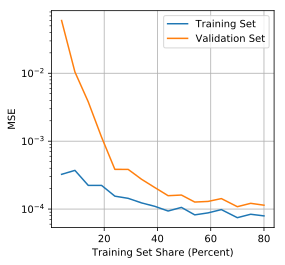

In [13]:
model = TwoLayerPerceptron(hidden_nodes=hidden_nodes_optimal)

n = patterns.shape[1]

splits = np.arange(0.8, 0.0, -0.05)

err_train_means = []
err_val_means = []

for split in splits:
    n_train = int(split * n)

    errors_train = []
    errors_val = []

    for _ in range(10):
        shuffle = np.random.permutation(n)

        inputs_train = patterns[:, shuffle][:, :n_train]
        inputs_val = patterns[:, shuffle][:, n_train:]

        labels_train = targets[:, shuffle][:, :n_train]
        labels_val = targets[:, shuffle][:, n_train:]

        model.train(inputs_train,
                    labels_train,
                    learning_rate=learning_rate_optimal,
                    epochs=epochs_optimal)

        errors_train.append(model.error(inputs_train, labels_train))
        errors_val.append(model.error(inputs_val, labels_val))

    err_train_mean = np.mean(errors_train)
    err_train_means.append(err_train_mean)

    err_val_mean = np.mean(errors_val)
    err_val_means.append(err_val_mean)

    err_train_std = np.std(errors_train)
    err_val_std = np.std(errors_val)

    perc_train = int(split * 100)
    perc_val = 100 - perc_train

    fmt = "{}/{} split: {:1.3e} +/- {:1.3e} training set MSE, {:1.3e} +/- {:1.3e} validation set MSE"
    print(fmt.format(perc_train, perc_val, err_train_mean, err_train_std, err_val_mean, err_val_std))

_, ax = subplots(1, 1)

ax.semilogy([int(s * 100) for s in splits], err_train_means, label="Training Set")
ax.semilogy([int(s * 100) for s in splits], err_val_means, label="Validation Set")

ax.set_xlabel("Training Set Share (Percent)")
ax.set_ylabel("MSE")

ax.legend()
ax.grid()

savefig('approx_varying_data.svg')

# Attempt to Speed Up Convergence

In [14]:
model = TwoLayerPerceptron(hidden_nodes=hidden_nodes_optimal)

n = patterns.shape[1]
n_train = int(0.8 * n)

learning_rates = np.arange(0.005, 0.055, 0.005)
momentum_alphas = np.linspace(0.9, 0.6, 4)
epochs_max = 10000

for lr in learning_rates:
    for alpha in momentum_alphas:
        shuffle = np.random.permutation(n)

        inputs_train = patterns[:, shuffle][:, :n_train]
        inputs_val = patterns[:, shuffle][:, n_train:]

        labels_train = targets[:, shuffle][:, :n_train]
        labels_val = targets[:, shuffle][:, n_train:]
        
        model.init_weights(inputs_train, labels_train)
        model.momentum = [0, 0]

        converged = False

        converging = False
        error_min = math.inf
        error_stale_iterations = 0
        error_stale_iterations_max = 10

        for epoch in range(epochs_max):
            model._train(inputs_train, labels_train, lr, alpha)

            error = model.error(inputs_val, labels_val)

            if error < 1e-4:
                converging=True
            
            if converging:
                if error >= error_min:
                    error_stale_iterations += 1

                    if error_stale_iterations == error_stale_iterations_max:
                        fmt = "CONVERGENCE for eta = {:1.1e}, alpha = {} after {} epochs, MSE is {:1.3e}"
                        print(fmt.format(lr, alpha, epoch + 1, error))

                        converged = True
                        break
                else:
                    error_min = error
                    error_stale_iterations = 0

            if converged:
                break
    
        if not converged:
            fmt = "NO CONVERGENCE for eta = {:1.1e}, alpha = {} after {} epochs, MSE is {:1.3e}"
            print(fmt.format(lr, alpha, epoch + 1, error))

NO CONVERGENCE for eta = 5.0e-03, alpha = 0.9 after 10000 epochs, MSE is 4.801e-05
NO CONVERGENCE for eta = 5.0e-03, alpha = 0.8 after 10000 epochs, MSE is 2.532e-05
NO CONVERGENCE for eta = 5.0e-03, alpha = 0.7 after 10000 epochs, MSE is 4.484e-05
NO CONVERGENCE for eta = 5.0e-03, alpha = 0.6 after 10000 epochs, MSE is 5.227e-05
NO CONVERGENCE for eta = 1.0e-02, alpha = 0.9 after 10000 epochs, MSE is 2.896e-05
NO CONVERGENCE for eta = 1.0e-02, alpha = 0.8 after 10000 epochs, MSE is 3.843e-05
NO CONVERGENCE for eta = 1.0e-02, alpha = 0.7 after 10000 epochs, MSE is 2.511e-05
NO CONVERGENCE for eta = 1.0e-02, alpha = 0.6 after 10000 epochs, MSE is 7.429e-05
NO CONVERGENCE for eta = 1.5e-02, alpha = 0.9 after 10000 epochs, MSE is 2.356e-05
NO CONVERGENCE for eta = 1.5e-02, alpha = 0.8 after 10000 epochs, MSE is 3.375e-05
NO CONVERGENCE for eta = 1.5e-02, alpha = 0.7 after 10000 epochs, MSE is 4.827e-05
CONVERGENCE for eta = 1.5e-02, alpha = 0.6 after 3123 epochs, MSE is 9.702e-05
NO CONVE